In [45]:
import torch
import torchvision
from torch import nn
from torchvision import datasets, models, transforms

from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

import image_utils

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
filelist = glob.glob('./test_images/dresses_sample/*.jpg')
filelist = sorted(filelist)
filenames = [os.path.basename(f).split('.jpg')[0] for f in filelist]

In [18]:
def load_features(path, filenames, load_fun):
    features = np.array([load_fun(os.path.join(path, f + '.npy')) for f in filenames])
    return(features)

In [22]:
f_path = './test_features/dresses_sample/'
load_fun = np.load

f_resnet_retrained = load_features(os.path.join(f_path, 'resnet_2048'), filenames, load_fun)
f_resnet_orig =      load_features(os.path.join(f_path, 'resnet_orig_2048'), filenames, load_fun)
f_resnet_pca64 =     load_features(os.path.join(f_path, 'resnet_pca64'), filenames, load_fun)
f_resnet_pca128 =    load_features(os.path.join(f_path, 'resnet_pca128'), filenames, load_fun)

load_fun = image_utils.load_feature_vector
f_114 = load_features(os.path.join(f_path, 'akiwi_114'), filenames, load_fun)

In [77]:
f_resnet_orig_std = StandardScaler().fit_transform(f_resnet_orig)
f_114_std = StandardScaler().fit_transform(f_114)

f_resnet_114 = np.concatenate([f_resnet_orig_std, f_114_std*2], axis=1)

/Users/sonynka/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
def get_similar_imgs(img_path, img_files, features, num_imgs=8):
    
    fig, axarr = plt.subplots(1, num_imgs, figsize=(num_imgs*2, 2))
    img_file_idx = img_files.index(img_path)
    img_feature = features[img_file_idx]
    dist = pairwise_distances(img_feature.reshape(1, -1), features)
    img_idxs = np.argsort(dist)[0].tolist()[:num_imgs]

    for i, img_idx in enumerate(img_idxs):
        img = Image.open(img_files[img_idx])
        ax = axarr[i]
        ax.axis('off')
        ax.imshow(img)

    plt.show()

In [100]:
test = filelist[12:14]

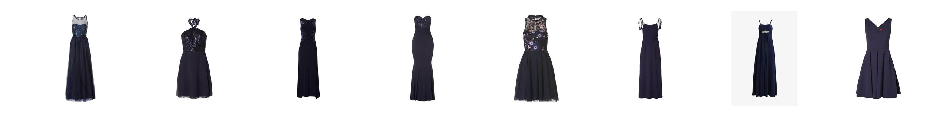

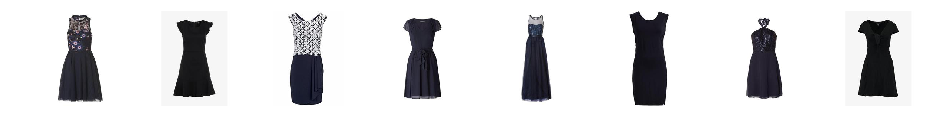

In [101]:
for img in test:  
    get_similar_imgs(img, filelist, f_114)

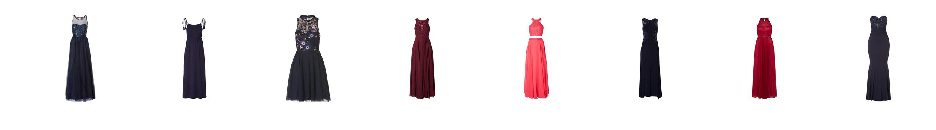

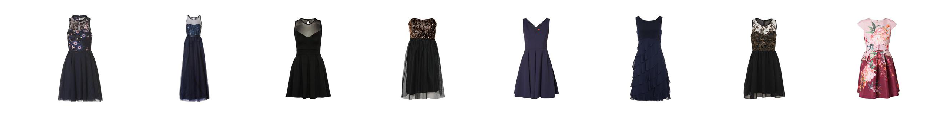

In [102]:
for img in test:  
    get_similar_imgs(img, filelist, f_resnet_orig)

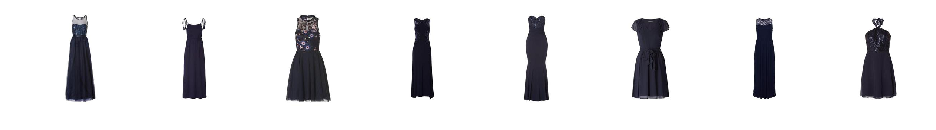

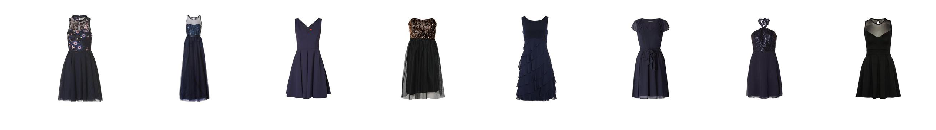

In [103]:
for img in test:  
    get_similar_imgs(img, filelist, f_resnet_114)s

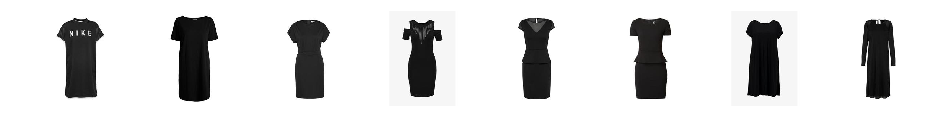

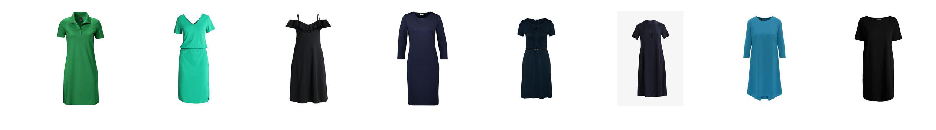

In [99]:
for img in test:  
    get_similar_imgs(img, filelist, f_resnet_retrained)

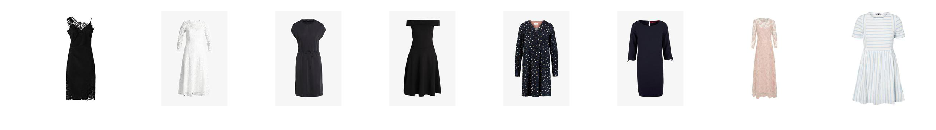

In [89]:
for img in test:  
    get_similar_imgs(img, filelist, f_resnet_pca64)

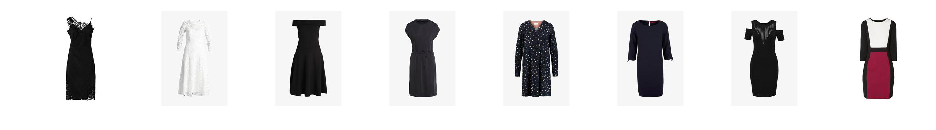

In [90]:
for img in test:  
    get_similar_imgs(img, filelist, f_resnet_pca128)